 # Regresion
 Hay una forma que explica los datos ~ Poblacion VERDAD!!! (BAYESIANOS VS FRECUENTISTAS) Guerra oculta  Yo no tengo verdad tengo data. Si la data cambia tengo otro modelo.

In [1]:
# Imports
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np  # Matrix and vector computation package
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Fancier plots
import pandas as pd

# Set seaborn plotting style
sns.set_style('darkgrid')
# Set the seed for reproducability
np.random.seed(seed=13)
#

In [2]:
#Distribution
#Inference
print("Notebook On")

Notebook On


In [4]:
df = pd.read_csv("data/ejemplo.csv", delimiter=";")
df.index.name = 'mes'
df

,Precio,Publicidad,Transporte,Venta
mes,,,,
0,50,50,50,95
1,50,50,50,95
2,30,50,50,107
3,50,50,50,95
4,50,50,50,95
5,30,80,50,167
6,50,50,50,95
7,50,50,50,95
8,30,80,80,182


In [5]:
df.describe().round(1)

,Precio,Publicidad,Transporte,Venta
count,10.0,10.0,10.0,10.0
mean,44.0,56.0,53.0,112.1
std,9.7,12.6,9.5,33.3
min,30.0,50.0,50.0,95.0
25%,35.0,50.0,50.0,95.0
50%,50.0,50.0,50.0,95.0
75%,50.0,50.0,50.0,104.0
max,50.0,80.0,80.0,182.0


array([<AxesSubplot:xlabel='mes'>, <AxesSubplot:xlabel='mes'>,
       <AxesSubplot:xlabel='mes'>, <AxesSubplot:xlabel='mes'>],
      dtype=object)

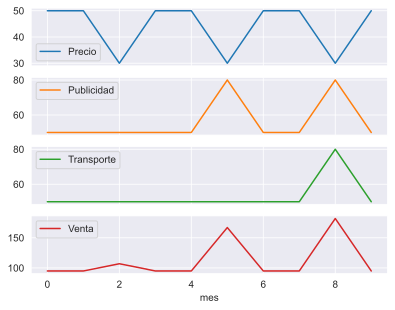

In [6]:
df.plot(subplots=True)


¿Hay una variable que depende de las demás?

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


/var/folders/hc/jwd08zzs6zg8d4ktgzqptl700000gp/T/ipykernel_47874/3807558231.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Precio,Publicidad,Transporte,Venta
Precio,1.00,-0.76,-0.51,-0.83
Publicidad,-0.76,1.00,0.67,0.99
Transporte,-0.51,0.67,1.00,0.74
Venta,-0.83,0.99,0.74,1.00


In [8]:
def Ventas(Precio, Publicidad, Transporte): 
    venta =  -Precio*0.6 + 2*Publicidad + 0.5*Transporte  
    return venta

In [9]:
df[2:3]

,Precio,Publicidad,Transporte,Venta
mes,,,,
2,30,50,50,107


In [10]:
Ventas(30, 50, 50)

107.0

In [11]:
df[3:4]

,Precio,Publicidad,Transporte,Venta
mes,,,,
3,50,50,50,95


In [12]:
Ventas(50, 50, 50)

95.0

# Forma Simple

In [13]:
def f(x): 
    return x * 2

In [14]:
f(2)

4

In [15]:
# Define the vector of input samples as x, with 20 values 
# sampled from a uniform distribution between 0 and 1
x = np.random.uniform(0, 1, 20)


In [16]:
x.shape[0]

20

In [17]:

np.random.randn(x.shape[0]) 

array([ 0.56284679, -0.24332625,  0.9137407 ,  0.31735092,  0.12730328,
        2.15038297,  0.60628866, -0.02677165, -0.98416078,  1.19070527,
        0.95283061, -1.08718159, -0.14521133,  0.23785784, -1.63909341,
       -0.27813452,  1.39923842, -1.61510796,  0.49087183,  1.89274222])

In [18]:
np.random.seed(613)
np.random.randn(x.shape[0]) 

array([ 0.52471068,  0.44721737,  3.46682891, -0.76836804,  0.61332222,
        0.06344976, -1.13507212, -1.48259998,  0.85685282, -0.55347441,
       -1.19177745,  0.28427132, -0.52707647, -0.63808525, -0.1486979 ,
       -1.03222479,  0.46188266, -1.18021924,  1.38919454, -0.14410442])

In [20]:
influencia_ruido = 0.2
ruido = np.random.randn(x.shape[0]) * influencia_ruido

In [21]:
x = np.random.uniform(0, 1, 20)

def f(x): 
    return x * 2

varianza_ruido = 0.2  
noise = np.random.randn(x.shape[0]) * varianza_ruido

t = f(x) + noise


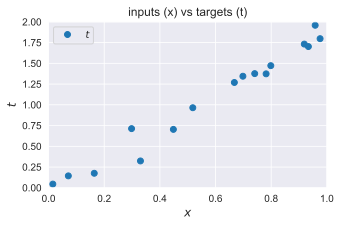

In [22]:
# Plot the target t versus the input x
plt.figure(figsize=(5, 3))
plt.plot(x, t, 'o', label='$t$')
# Plot the initial line
#PEOR MODELO plt.plot([0, 1], [t.mean(), t.mean()], 'b--', label='$f(x)$')
#mejor modelo plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.axis((0, 1, 0, 2))
plt.title('inputs (x) vs targets (t)')
plt.legend(loc=2)
plt.show()

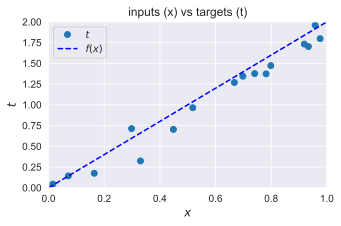

In [23]:
# Plot the target t versus the input x
plt.figure(figsize=(5, 3))
plt.plot(x, t, 'o', label='$t$')
# Plot the initial line
#PEOR MODELO plt.plot([0, 1], [t.mean(), t.mean()], 'b--', label='$f(x)$')
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.axis((0, 1, 0, 2))
plt.title('inputs (x) vs targets (t)')
plt.legend(loc=2)
plt.show()

In [24]:
#https://setosa.io/ev/ordinary-least-squares-regression/

# Busco la rotación con menor error cuadratico medio

In [25]:
ws =  np.linspace(0, 4, num=100) 
#Numero entre 0 y 4

In [26]:
def algoritmo_busqueda(x, w):
    return x * w


In [27]:
def perdida(y, t):
    return np.mean((t - y)**2)

In [28]:
loss_ws = np.vectorize(lambda w: perdida(algoritmo_busqueda(x, w) , t))(ws)

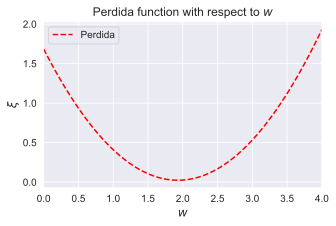

In [29]:
# Plot
plt.figure(figsize=(5, 3))
plt.plot(ws, loss_ws, 'r--', label='Perdida')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Perdida function with respect to $w$')
plt.xlim(0, 4)
plt.legend()
plt.show()
#

In [30]:
def gradient(w, x, t):
    """Gradient function. (Remember that y = nn(x, w) = x * w)"""
    return 2 * x * (algoritmo_busqueda(x, w) - t)


def delta_w(w_k, x, t, learning_rate):
    """Update function delta w"""
    return learning_rate * np.mean(gradient(w_k, x, t))


# Initial weight parameter
w = np.random.rand()
# Set the learning rate
learning_rate = 0.9

# Perform the gradient descent updates, and print the weights and loss:
nb_of_iterations = 4  # number of gradient descent updates
w_loss = [(w, perdida(algoritmo_busqueda(x, w), t))] # Keep track of weight and loss values
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # Delta w update
    w = w - dw  # Update the current weight parameter
    w_loss.append((w, perdida(algoritmo_busqueda(x, w), t)))  # Save weight and loss

# Print the final w, and loss
for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

w(0): 0.0147 	 loss: 1.6603
w(1): 1.5519 	 loss: 0.0880
w(2): 1.8558 	 loss: 0.0265
w(3): 1.9159 	 loss: 0.0241
w(4): 1.9278 	 loss: 0.0240


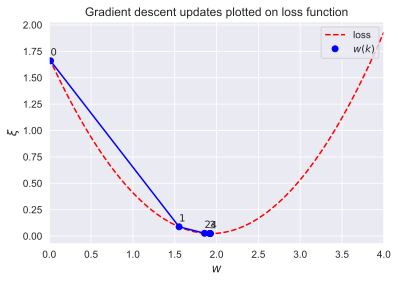

In [31]:
# Visualise the gradient descent updates
plt.figure(figsize=(6, 4))
plt.plot(ws, loss_ws, 'r--', label='loss')  # Loss curve
# Plot the updates
for i in range(0, len(w_loss)-1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.05, f'${i}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.05, f'${i+1}$')
# Show figure
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Gradient descent updates plotted on loss function')
plt.xlim(0, 4)
plt.legend(loc=1)
plt.show()

In [32]:
w = np.random.rand()
# Start performing the gradient descent updates
nb_of_iterations = 10  # number of gradient descent updates
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # get the delta w update
    w = w - dw  # update the current weight parameter

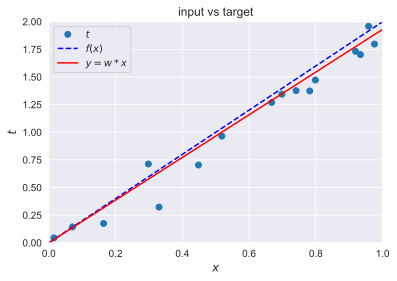

In [33]:
# Plot the fitted line agains the target line
plt.figure(figsize=(6, 4))
# Plot the target t versus the input x
plt.plot(x, t, 'o', label='$t$')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
# plot the fitted line
plt.plot([0, 1], [0*w, 1*w], 'r-', label='$y = w * x$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.title('input vs target')
plt.legend(loc=2)
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.show()

In [34]:
df

,Precio,Publicidad,Transporte,Venta
mes,,,,
0,50,50,50,95
1,50,50,50,95
2,30,50,50,107
3,50,50,50,95
4,50,50,50,95
5,30,80,50,167
6,50,50,50,95
7,50,50,50,95
8,30,80,80,182


# statsmodels con cuestiones simples

In [35]:
#venta =  -Precio*0.6 + 2*Publicidad + 0.5*Transporte

In [38]:
!pip install statsmodels

     |████████████████████████████████| 9.6 MB 2.2 MB/s            
     |████████████████████████████████| 233 kB 1.3 MB/s            
You should consider upgrading via the '/Users/federicomoreno/PycharmProjects/UCEMA/venv/bin/python -m pip install --upgrade pip' command.


In [39]:
import statsmodels.formula.api as smf
model1 = smf.ols('Venta ~ Publicidad + Transporte + Precio', data=df).fit()


In [40]:
print(model1.params)

Intercept     0.0
Publicidad    2.0
Transporte    0.5
Precio       -0.6
dtype: float64


In [41]:
model1.rsquared

1.0

In [42]:
model1.rsquared_adj

1.0

In [43]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Venta   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.364e+28
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           6.79e-86
Time:                        19:19:28   Log-Likelihood:                 279.43
No. Observations:                  10   AIC:                            -550.9
Df Residuals:                       6   BIC:                            -549.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0   1.03e-12          0      1.0

/Users/federicomoreno/PycharmProjects/UCEMA/venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [44]:
#Graficar los residuos

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


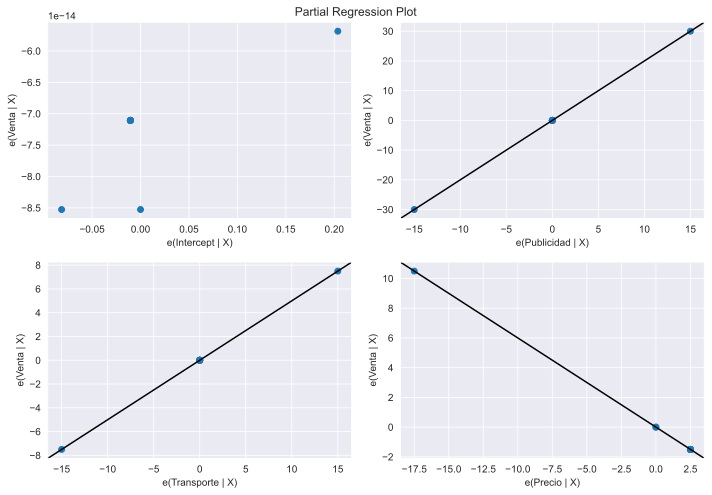

In [45]:
import statsmodels.api as sm
fig = plt.figure(figsize=(10,7))
fig = sm.graphics.plot_partregress_grid(model1, fig=fig)